## 一、导库导数据，探索特征

### 1.导入需要的库

In [1]:
import pandas as pd
import numpy as np

### 2.导入数据探索数据

In [2]:
weather = pd.read_csv("E:/weather.csv",index_col=0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


|特征|标签含义|
|:--:|:--:|
Date |观察日期
Location |获取该信息的气象站的名称
MinTemp |以摄氏度为单位的最低温度
MaxTemp |以摄氏度为单位的最高温度
Rainfall |当天记录的降雨量，单位为mm
Evaporation |到早上9点之前的24小时的A级蒸发量（mm）
Sunshine |白日受到日照的完整小时
WindGustDir |在到午夜12点前的24小时中的最强风的风向
WindGustSpeed |在到午夜12点前的24小时中的最强风速（km / h）
WindDir9am |上午9点时的风向
WindDir3pm |下午3点时的风向
WindSpeed9am |上午9点之前每个十分钟的风速的平均值（km / h）
WindSpeed3pm |下午3点之前每个十分钟的风速的平均值（km / h）
Humidity9am |上午9点的湿度（百分比）
Humidity3am |下午3点的湿度（百分比）
Pressure9am |上午9点平均海平面上的大气压（hpa）
Pressure3pm |下午3点平均海平面上的大气压（hpa）
Cloud9am|上午9点的天空被云层遮蔽的程度，这是以“oktas”来衡量的，这个单位记录了云层遮挡天空的程度。0表示完全晴朗的天空，而8表示它完全是阴天。
Cloud3pm |下午3点的天空被云层遮蔽的程度
Temp9am |上午9点的摄氏度温度
Temp3pm |下午3点的摄氏度温度
RainTomorrow |目标变量，我们的标签：明天下雨了吗？

粗略观察可以发现，这个特征矩阵由一部分分类变量和一部分连续变量组成，其中云层遮蔽程度虽然是以数字表
示，但是本质却是分类变量。大多数特征都是采集的自然数据，比如蒸发量，日照时间，湿度等等，而少部分特征
是人为构成的。还有一些是单纯表示样本信息的变量，比如采集信息的地点，以及采集的时间。

In [3]:
#将特征矩阵和标签Y分开
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]
X.shape

(142193, 21)

In [4]:
#探索数据类型
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
#探索缺失值，以及缺失值所占总值的比例
X.isnull().sum()/X.shape[0]

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
dtype: float64

In [6]:
#或者使用
X.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
dtype: float64

In [7]:
#探索标签的分类
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [8]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [9]:
#是否有样本不平衡问题？
Y.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [10]:
#将标签编码
from sklearn.preprocessing import LabelEncoder #标签专用
Y = LabelEncoder().fit_transform(Y) #允许一维数据的输入的
#认得了：有两类，YES和NO，YES是1，NO是0

In [11]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
pd.DataFrame(Y).iloc[:,0].value_counts()

0    110316
1     31877
Name: 0, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EBF4DC8>]],
      dtype=object)

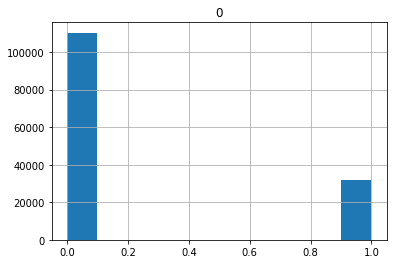

In [13]:
pd.DataFrame(Y).hist()

## 三、探索特征，处理特征矩阵

In [14]:
#描述性统计
X.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,-1.8,1.8,3.90,7.6,12.0,16.8,20.8,25.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,9.1,12.8,14.50,17.9,22.6,28.2,32.9,40.1,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.00,0.0,0.0,0.8,6.0,37.4,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,0.4,1.0,1.40,2.6,4.8,7.4,10.2,18.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,0.0,0.3,1.56,4.9,8.5,10.6,12.1,13.4,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,15.0,20.0,24.00,31.0,39.0,48.0,57.0,81.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,0.0,0.0,4.00,7.0,13.0,19.0,26.0,39.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,2.0,6.0,9.00,13.0,19.0,24.0,30.0,43.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,17.0,34.0,44.00,57.0,70.0,83.0,94.0,100.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,9.0,17.0,23.00,37.0,52.0,66.0,79.0,98.0,100.0


### 1. 数据可视化探索特征

In [15]:
# X.plot.line(subplots=True,figsize=(20,20))

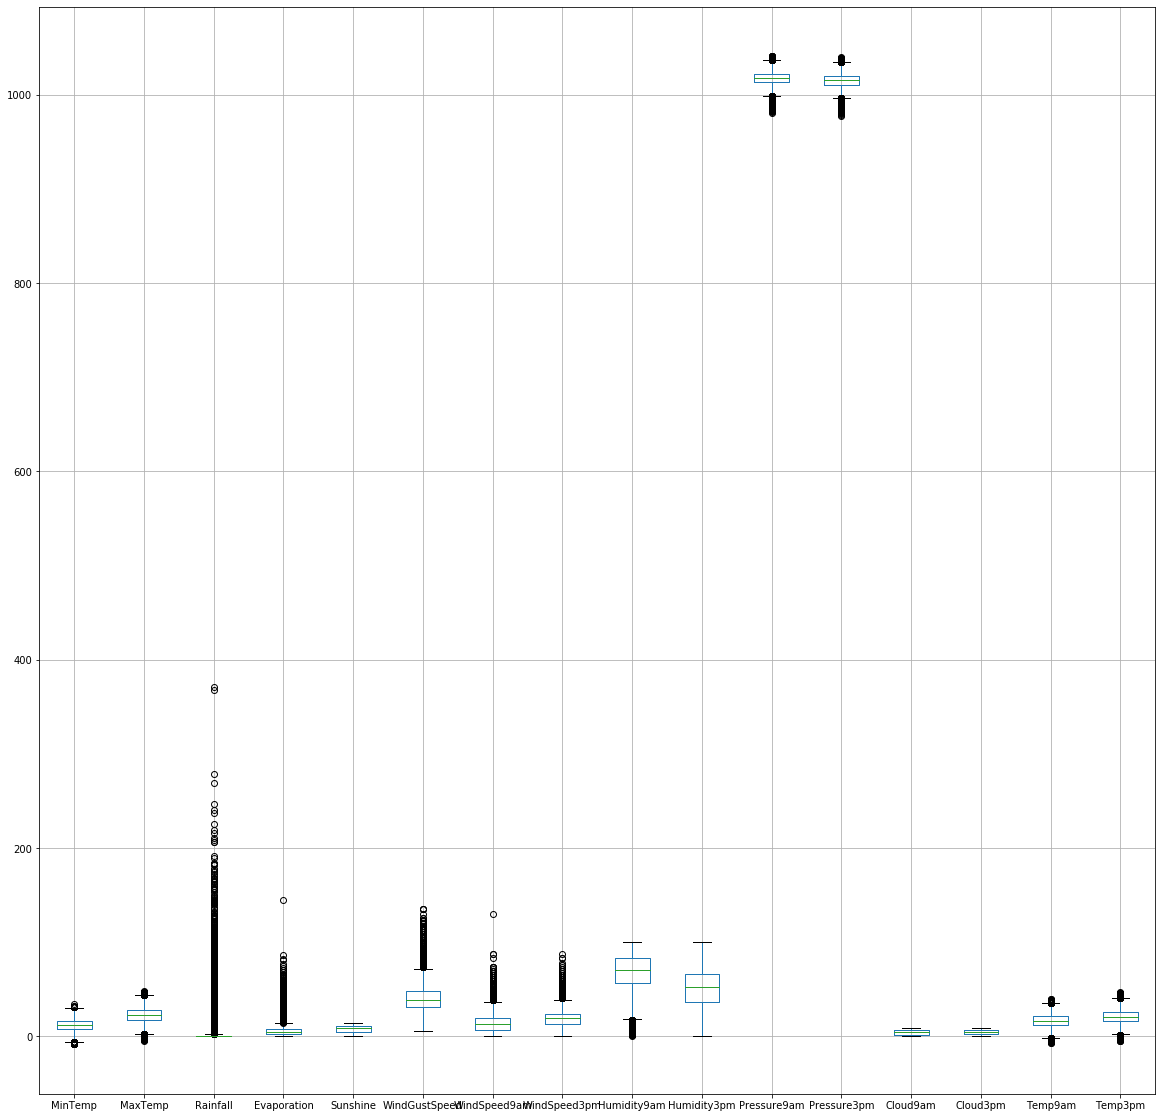

In [16]:
#利用箱线图来查看数据得情况，有没有异常值
X.boxplot(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FB95708>,
      dtype=object)

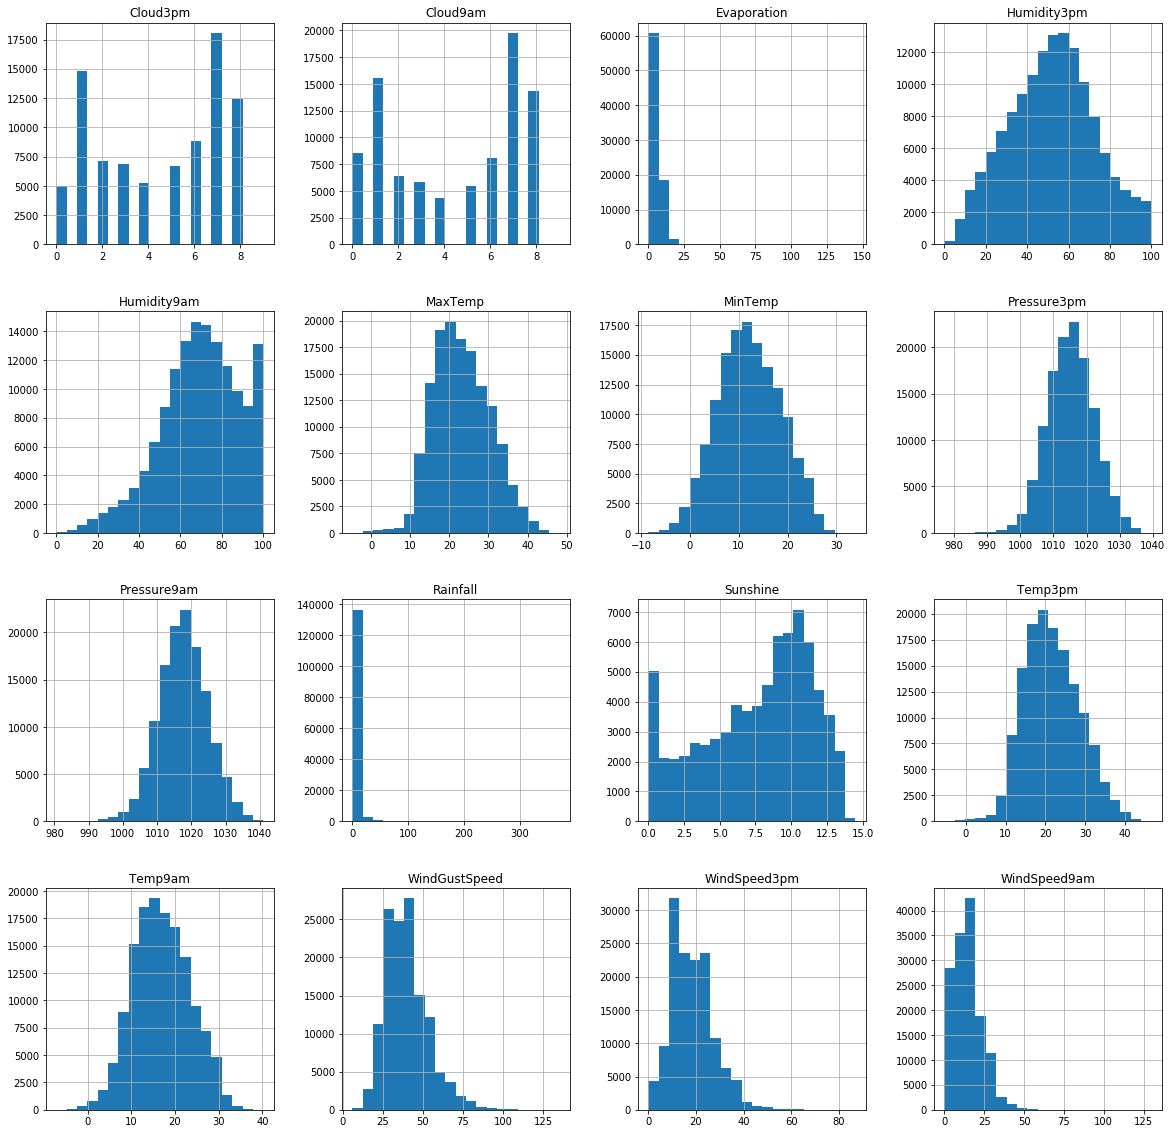

In [17]:
#查看数据分布状态
X.hist(bins=20,figsize=(20,20))

通过箱线图和分布图可以发现"Rainfall","Evaporation"存在异常值较多，后续需要处理。

针对于异常值如何处理一般有三种思路：

1.针对异常值较少，不重要可采取直接删除；

2.将异常值当成缺失值处理，采用缺失值的各种处理方法；

3.将异常值单独取出做分析。

### 2. 处理困难特征：日期


In [18]:
X["Date"].value_counts()

2013-05-30    49
2014-06-10    49
2016-05-22    49
2017-06-10    49
2013-04-01    49
              ..
2007-12-31     1
2008-01-23     1
2008-01-01     1
2007-12-01     1
2007-11-18     1
Name: Date, Length: 3436, dtype: int64

### 这里首先要思考一个问题：

**我们采集数据的日期是否和我们的天气有关系呢？**

**分析：**
    

    如果我们把它当作分类型变量处理，类别太多，有2141类，如果换成数值型，会被直接当成连续型变量，如果做成哑变量，我们特征的维度会爆炸。
    
    如果我们的思考简单一些，我们可以直接删除日期这个特征。首先它不是一个直接影响我们标签的特征，并且要处理日期其实是非常困难的。如果大家认可这种思路，那可以直接运行下面的代码来删除我们的日期


In [19]:
#直接删除日期
# X = Xtrain.drop(["Date"],axis=1)

其实我们可以想到，日期必然是和我们的结果有关的，它会从两个角度来影响我们的标签：

    1.昨天的天气可能会影响今天的天气，而今天的天气又可能会影响明天的天气。也就是说，随着日期的逐渐改变，样本是会受到上一个样本的影响的。特征中有一列叫做“Rainfall"，这是表示当天的降雨量。凭常识我们认为，今天是否下雨，应该会影响明天是否下雨，比如有的地方可能就有这样的气候，一旦下雨就连着下很多天，也有可能有的地方的气候就是一场暴雨来得快去的快。因此，我们可以将时间对气候的连续影响，转换为”今天是否下雨“这个特征。

In [20]:
X["Rainfall"].head(20)

0      0.6
1      0.0
2      0.0
3      0.0
4      1.0
5      0.2
6      0.0
7      0.0
8      0.0
9      1.4
10     0.0
11     2.2
12    15.6
13     3.6
14     NaN
15     0.0
16    16.8
17    10.6
18     0.0
19     0.0
Name: Rainfall, dtype: float64

In [21]:
#查看空值
X["Rainfall"].isnull().sum()

1406

In [22]:
#构造特诊今天是否下雨“RainToday”。
X.loc[X["Rainfall"] >= 1,"RainToday"] = "Yes"
X.loc[X["Rainfall"] < 1,"RainToday"] = "No"
X.loc[X["Rainfall"] == np.nan,"RainToday"] = np.nan

In [23]:
X["RainToday"].value_counts()

No     107585
Yes     33202
Name: RainToday, dtype: int64

    2.对于我们而言，日期本身并不影响天气，但是日期所在的月份和季节其实是影响天气的，如果任选梅雨季节的某一天，那明天下雨的可能性必然比非梅雨季节的那一天要大。虽然我们无法让机器学习体会不同月份是什么季节，但是我们可以对不同月份进行分组，算法可以通过训练感受到，“这个月或者这个季节更容易下雨”。因此，我们可以将月份或者季节提取出来，作为一个特征使用，而舍弃掉具体的日期。如此，我们又可以创造第二个特征，月份"Month"。

In [24]:
X["Date"]

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
142188    2017-06-20
142189    2017-06-21
142190    2017-06-22
142191    2017-06-23
142192    2017-06-24
Name: Date, Length: 142193, dtype: object

In [25]:
int(X.loc[0,"Date"].split("-")[1]) #提取出月份

12

In [26]:
#apply是对dataframe上的某一列进行处理的一个函数
#lambda x匿名函数，请在dataframe上这一列中的每一行帮我执行冒号后的命令
X["Date"] = X["Date"].apply(lambda x:int(x.split("-")[1]))

#替换完毕后，我们需要修改列的名称,可以用rename来修改单个列名的函数
X = X.rename(columns={"Date":"Month"})

In [27]:
X["Month"].value_counts()

5     13055
3     13036
1     12921
6     12389
10    11804
7     11779
8     11762
11    11461
9     11345
4     11306
12    10810
2     10525
Name: Month, dtype: int64

**通过时间，我们处理出两个新特征，“今天是否下雨”和“月份”。**

### 3. 处理困难特征：地点（尴尬……目前我还处理不了）

常识上来说，我们认为地点肯定是对明天是否会下雨存在影响的。比如说，如果其他信息都不给出，我们只猜测，“杭州明天是否会下雨”和”北京明天是否会下雨“，我一定会猜测杭州会下雨，而北京不会。

In [28]:
#由于处理不了地点这个特诊，我只能忍痛把他丢掉

In [29]:
X = X.drop(["Location"],axis=1)

### 4. 处理分类型变量缺失值

    由于我们的特征矩阵由两种类型的数据组成：分类型和连续型，因此我们必须对两种数据采用不同的填补缺失值策略。传统地，如果是分类型特征，我们则采用众数进行填补。如果是连续型特征，我们则采用均值来填补。
    
`from sklearn.impute import SimpleImputer`

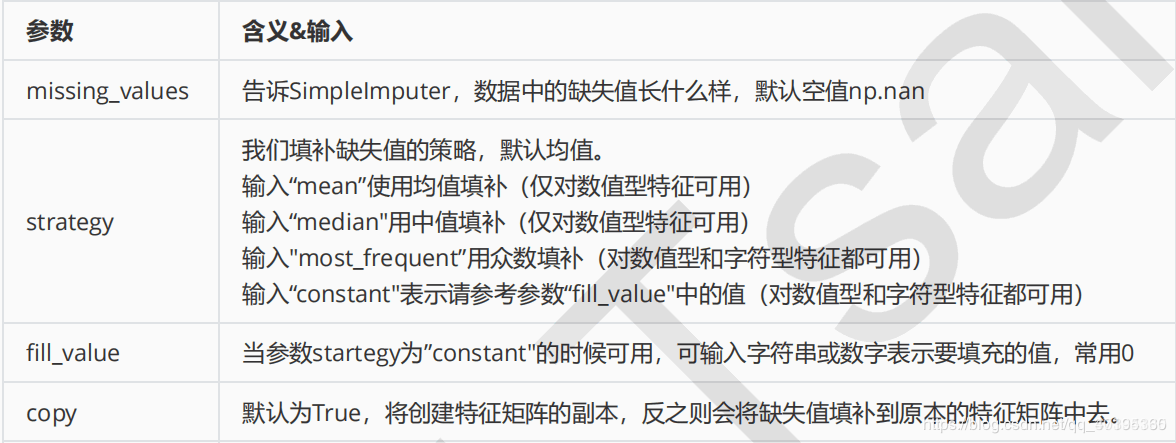
    

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Month          142193 non-null  int64  
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

**划分数据类型**

    1.连续型变量
    2.有序性变量
    3.名义型变量

In [31]:
#首先划分分类型变量和连续性变量
cate = X.columns[X.dtypes == "object"].tolist()
cate

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [32]:
#除了特征类型为"object"的特征们，还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud
cate

['WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [33]:
# #划分出连续性数据
# cont = X.columns[X.dtypes == "float" or "int"].tolist()

In [34]:
#对于分类型特征，我们使用众数来进行填补,这里你也可以使用pandas来填充
from sklearn.impute import SimpleImputer #0.20, conda, pip

si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
#注意，我们使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数
X.loc[:,cate] = si.fit_transform(X.loc[:,cate])

In [35]:
#查看分类型特征是否依然存在缺失值
X.loc[:,cate].isnull().mean()

WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

### 5. 将分类型变量编码

    在机器学习中，大多数算法，譬如逻辑回归，支持向量机SVM，k近邻算法等都只能够处理数值型数据，不能处理文字，在sklearn当中，除了专用来处理文字的算法，其他算法在fit的时候全部要求输入数组或矩阵，也不能够导入文字型数据（其实手写决策树和朴素贝叶斯可以处理文字，但是sklearn中规定必须导入数值型）。然而在现实中，许多标签和特征在数据收集完毕的时候，都不是以数字来表现的。比如说，学历的取值可以是["小学"，“初中”，“高中”，"大学"]，付费方式可能包含["支付宝"，“现金”，“微信”]等等。在这种情况下，为了让数据适应算法和库，我们必须将数据进行编码，即是说，将文字型数据转换为数值型。
    
    
    
 **补充**
 
 
| 数据类型 | 数据名称 |数学含义 |描述 |举例|可用操作|
:----:|:---:|:---:|:--:|:---:|:---:|
| 离散变量，定性 |名义|=，≠ |名义变量就是不同的名字，是用来告诉我们，这两个数据是否相同的| 邮编、性别、职工号，颜色等 | 取众数、信息熵、情形分析表或列联表、相关性分析、卡方检验
|离散变量，定性 |有序 |<,> |有序变量为数据的相对大小提供信息，告诉我们数据的顺序，但数据之间大小的间隔不是具有固定意义的，因此有序变量不能加减 |收入高低、学历、硬度、强度等 |中位数、分位数、非参数相关性分析、测量系统分析、符号检验
|连续变量，定量|有距|+，-|有距变量之间的间隔是有固定意义的，可以加减，不能乘除|日期、以摄氏度或华氏度为量纲的温度|均值、标准差、皮尔逊相关系数、t检验和F检验
|连续变量，定量|比率|+，-，*，/|可以加减乘除|收入、年龄、质量、长度、数量等|平均、百分数、变化量等



**有序性分类变量处理**

包含：Cloud9am Cloud3pm

In [36]:
# order = ["Cloud9am","Cloud3pm"]

In [37]:
#将所有有序分类型变量编码为数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

#进行fit
X.loc[:,cate] = oe.fit_transform(X.loc[:,cate])


In [38]:
X.loc[:,cate].head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,13.0,13.0,14.0,0.0,8.0,7.0
1,14.0,6.0,15.0,0.0,7.0,7.0
2,15.0,13.0,15.0,0.0,7.0,2.0
3,4.0,9.0,0.0,0.0,7.0,7.0
4,13.0,1.0,7.0,1.0,7.0,8.0


In [39]:
X.loc[:,cate].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WindGustDir  142193 non-null  float64
 1   WindDir9am   142193 non-null  float64
 2   WindDir3pm   142193 non-null  float64
 3   RainToday    142193 non-null  float64
 4   Cloud9am     142193 non-null  float64
 5   Cloud3pm     142193 non-null  float64
dtypes: float64(6)
memory usage: 7.6 MB


In [40]:
col = X.columns.tolist()
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

**名义型分类变量**

    类别OrdinalEncoder可以用来处理有序变量，但对于名义变量，我们只有使用哑变量的方式来处理，才能够尽量向算法传达最准确的信息。


In [41]:
# nomi = ["WindGustDir","WindDir9am","WindDir3pm","RainToday"]

In [42]:
# X.loc[:,nomi].head()

In [43]:
# #使用哑变量的方式来处理
# from sklearn.preprocessing import OneHotEncoder
# # 如果不加 toarray() 的话，输出的是稀疏的存储格式，即索引加值的形式
# X_nomi = OneHotEncoder().fit_transform(X.loc[:,nomi]).toarray()

In [44]:
# X_nomi = pd.DataFrame(X_nomi)

In [45]:
# X_nomi

In [46]:
#将编码后的特征追加在原始数据上，并将原始特征数据删除

# X = pd.concat([X.drop(nomi,axis=1),X_nomi],axis=1)

In [47]:
# X.head()

### 6. 连续型变量填补缺失值

    连续型变量的缺失值由均值来进行填补。连续型变量往往已经是数字，无需进行编码转换。与分类型变量中一样，我们也是使用训练集上的均值对测试集进行填补。如果学过随机森林填补缺失值的小伙伴，可能此时会问，为什么不使用算法来进行填补呢？使用算法进行填补也是没有问题的，但在现实中，其实我们非常少用到算法来进行填补，有以下几个理由：
    
    1. 算法是黑箱，解释性不强。如果你是一个数据挖掘工程师，你使用算法来填补缺失值后，你不懂机器学习的老板或者同事问你的缺失值是怎么来的，你可能需要从头到尾帮他/她把随机森林解释一遍，这种效率过低的事情是不可能做的，而许多老板和上级不会接受他们无法理解的东西。
    
    2. 算法填补太过缓慢，运行一次森林需要有至少100棵树才能够基本保证森林的稳定性，而填补一个列就需要很长的时间。在我们并不知道森林的填补结果是好是坏的情况下，填补一个很大的数据集风险非常高，有可能需要跑好几个小时，但填补出来的结果却不怎么优秀，这明显是一个低效的方法。
    
    因此在现实工作时，我们往往使用易于理解的均值或者中位数来进行填补。当然了，在算法比赛中，我们可以穷尽一切我们能够想到的办法来填补缺失值以追求让模型的效果更好，不过现实中，除了模型效果之外，我们还要追求可解释性。


In [48]:
X.isnull().mean()

Month            0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.000000
WindGustSpeed    0.065193
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.006358
Temp3pm          0.019171
RainToday        0.000000
dtype: float64

In [49]:
#去除分类型变量
for i in cate:
    col.remove(i)

col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [50]:
#实例化模型，填补策略为"mean"表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")
#fit模型
X.loc[:,col] = impmean.fit_transform(X.loc[:,col])

In [51]:
X.isnull().mean()

Month            0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

### 7. 连续性变量无量纲化

    数据的无量纲化是SVM执行前的重要步骤，因此我们需要对数据进行无量纲化。但注意，这个操作我们不对分类型变量进行。
    
    

In [52]:
col.remove("Month")
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [53]:
#数据转换为均值为0，方差为1的数据
#标准化不改变数据的分布，不会把数据变成正态分布的
from sklearn.preprocessing import StandardScaler 
X.loc[:,col] = StandardScaler().fit_transform(X.loc[:,col])

In [54]:
X.head()

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12.0,0.189954,-0.045964,-0.207757,0.0,-6.495101e-16,13.0,0.305648,13.0,14.0,...,0.614850,0.113891,-1.435935,-1.475456,-1.220966,8.0,7.0,-0.013521,0.016412,0.0
1,12.0,-0.749174,0.263480,-0.278989,0.0,-6.495101e-16,14.0,0.305648,6.0,15.0,...,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,7.0,7.0,0.032832,0.380274,0.0
2,12.0,0.111694,0.347873,-0.278989,0.0,-6.495101e-16,15.0,0.457874,13.0,15.0,...,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,7.0,2.0,0.619963,0.220175,0.0
3,12.0,-0.467436,0.671383,-0.278989,0.0,-6.495101e-16,4.0,-1.216614,9.0,0.0,...,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,7.0,7.0,0.171889,0.700472,0.0
4,12.0,0.831692,1.276205,-0.160269,0.0,-6.495101e-16,13.0,0.077309,1.0,7.0,...,0.156214,0.694918,-0.900186,-1.015940,-1.385593,7.0,8.0,0.125537,1.166215,1.0


### 8. 划分数据集

In [55]:
#分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [56]:
# #恢复索引
# for i in [Xtrain, Xtest, Ytrain, Ytest]:
#     i.index = range(i.shape[0])

### 9. SVC-模型

In [57]:
from time import time #随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

#### 9.1 调整核函数</p>

In [58]:
# #建模选择自然是我们的支持向量机SVC，首先用核函数的学习曲线来选择核函数
# #我们希望同时观察，精确性，recall以及AUC分数
# times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控我们的模型运行时间

# for kernel in ["linear","poly","rbf","sigmoid"]:
#     clf = SVC(kernel = kernel,gamma="auto",degree = 1,cache_size = 10000).fit(Xtrain, Ytrain)
#     result = clf.predict(Xtest)
#     score = clf.score(Xtest,Ytest)
#     recall = recall_score(Ytest, result)
#     auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
#     print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
#     print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

<p>我们注意到，模型的准确度和auc面积还是勉勉强强，但是每个核函数下的recall都不太高。相比之下，其实线性模型的效果是最好的。那现在我们可以开始考虑了，在这种状况下，我们要向着什么方向进行调参呢？我们最想要的是什么？</p>
我们可以有不同的目标：</p>
<p>一，我希望不计一切代价判断出少数类，得到最高的recall。</p>
<p>二，我们希望追求最高的预测准确率，一切目的都是为了让accuracy更高，我们不在意recall或者AUC。</p>
<p>三，我们希望达到recall，ROC和accuracy之间的平衡，不追求任何一个也不牺牲任何一个</p>

#### 9.2 最求最高Recall


<p>如果我们想要的是最高的recall，可以牺牲我们准确度，希望不计一切代价来捕获少数类，那我们首先可以打开我们的class_weight参数，使用balanced模式来调节我们的recall。</p>

In [59]:
times = time()
clf = SVC(kernel = "rbf",gamma="auto",class_weight = "balanced",cache_size = 10000).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.805664, recall is 0.760000', auc is 0.871060
41:46:279992


随着recall地无节制上升，我们的精确度下降得十分厉害，不过看起来AUC面积却还好，稳定保持在0.87左右。如果此时我们的目的就是追求一个比较高的AUC分数和比较好的recall，那我们的模型此时就算是很不错了。虽然现在，我们的精确度很低，但是我们的确精准地捕捉出了每一个雨天。



#### 9.3 追求平衡


我们前面经历了多种尝试，选定了高斯核，现在我们来试试看调节线性核函数的C值能否有效果.

under C 1.000000, testing accuracy is 0.799405,recall is 0.772913', auc is 0.874904
27:26:617645
under C 2.000000, testing accuracy is 0.800155,recall is 0.775853', auc is 0.876551
27:20:059989
under C 3.000000, testing accuracy is 0.799803,recall is 0.779003', auc is 0.877328
27:52:438227
under C 4.000000, testing accuracy is 0.800319,recall is 0.779528', auc is 0.877801
27:25:472531
under C 5.000000, testing accuracy is 0.799780,recall is 0.779318', auc is 0.878117
27:39:782962
under C 6.000000, testing accuracy is 0.799733,recall is 0.779423', auc is 0.878332
27:08:588843
under C 7.000000, testing accuracy is 0.799733,recall is 0.779633', auc is 0.878548
26:58:264811
under C 8.000000, testing accuracy is 0.799967,recall is 0.779528', auc is 0.878675
27:48:879871
under C 9.000000, testing accuracy is 0.800178,recall is 0.780262', auc is 0.878811
28:07:099693
under C 10.000000, testing accuracy is 0.800319,recall is 0.780262', auc is 0.878886
28:38:475830
0.8788861435178177 10.0


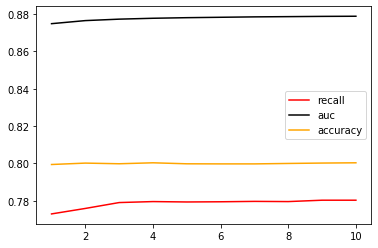

In [60]:
###======【TIME WARNING】======###
import matplotlib.pyplot as plt
C_range = np.linspace(1,10,10)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "rbf",C=C,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %
(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()

可以观察到几个现象。


首先，我们注意到，随着C值逐渐增大，模型的运行速度变得越来越慢。对于SVM这个本来运行就不快的模型来说，巨大的C值会是一个比较危险的消耗。所以正常来说，我们应该设定一个较小的C值范围来进行调整。


其次，C很小的时候，模型的各项指标都很低，但当C到1以上之后，模型的表现开始逐渐稳定，在C逐渐变大之后，模型的效果并没有显著地提高。可以认为我们设定的C值范围太大了，然而再继续增大或者缩小C值的范围，AUC面积也只能够在0.86上下进行变化了，调节C值不能够让模型的任何指标实现质变.


我们把目前为止最佳的C值带入模型，看看我们的准确率，Recall的具体值.

In [61]:
times = time()
clf = SVC(kernel = "rbf",C=4,class_weight = "balanced").fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))


testing accuracy 0.800319,recall is 0.779528', auc is 0.877801
26:44:715456


可以看到，这种情况下模型的准确率，Recall和AUC都没有太差，但是也没有太好，这也许就是模型平衡后的一种结果。现在，光是调整支持向量机本身的参数，已经不能够满足我们的需求了，要想让AUC面积更进一步，我们需要绘制ROC曲线，查看我们是否可以通过调整阈值来对这个模型进行改进.

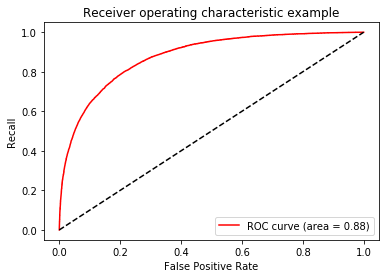

In [62]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt
FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))

plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [63]:
#以此模型作为基础，我们来求解最佳阈值：
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

-0.0827962727570164

In [64]:
#基于我们选出的最佳阈值，我们来认为确定y_predict，并确定在这个阈值下的recall和准确度的值：
from sklearn.metrics import accuracy_score as AC
times = time()
clf = SVC(kernel = "rbf",C=4,class_weight = "balanced").fit(Xtrain, Ytrain)
prob = pd.DataFrame(clf.decision_function(Xtest))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0
prob.loc[:,"y_pred"].isnull().sum()
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.790942,recall is 0.798530
21:47:681755


反而还不如我们不调整时的效果好。可见，如果我们追求平衡，那SVC本身的结果就已经非常接近最优结果了。调
节阈值，调节参数C和调节class_weight都不一定有效果。但整体来看，我们的模型不是一个糟糕的模型，但这个
结果如果提交到kaggle参加比赛是绝对不足够的。如果大家感兴趣，还可以更加深入地探索模型，或者换别的方法
来处理特征，以达到AUC面积0.9以上，或是准确度或recall都提升到90%以上。

### 最后补充一句：我TM傻了，我会用这个算法，MMP打死我也不用了